# Elliptic Curve Cryptography

This file is only here for reference

### Elliptic Curves

An elliptic curve over a field $K$ is a curve defined by an equation of the form:

\begin{equation}
\begin{split}
   y^2= x^3 + ax +b\\
\end{split}
\end{equation}

where $a, b \in K$ and $−16(4a^3 + 27b^2) \neq 0$

### Importing necessary modules

In [31]:
import numpy as np
import matplotlib.pyplot as plt
inf = "Infinity"

### Making some helper functions

In [32]:
def Mod(x,p):
    return x%p

##### We know if gcd(e, m) = 1, then $ed ≡ 1$ mod  $m$ has a unique solution:
$$gcd(e,m) = ex+my = 1$$
##### From this we can calculate $d$
##### To calculate $x$ and $y$, we extend the algorithm
##### Let $e = qm + r$ such that $0 <= r < m$. Then
$$g = um + vr$$
$$= um + v(e − qm)$$
$$= ve + (u − qv)m$$
##### Thus we can take $x = v$ and $y = u − qv$

In [33]:
def extended_euclid(m,n):
        if n == 0:
            return (m,1,0)
        else:
            q = m // n
            r = m % n
            (g,u,v) = extended_euclid(n,r)
        return (g,v,u-q*v)

def inv(s,p):
        (g,x,y) = extended_euclid(s,p)
        if (g != 1):
            return (0) 
        else:
            return(x % p)

In [34]:
# checking the inverse
Mod(Mod(7,13)*inv(7,13),13)

1

### Creating a class for Elliptic Curves

In [35]:
class ECC:
    

    def __init__(self,a,b,p):
        self.a = a
        self.b = b
        self.p = p
        self.points = []
        self.Points()


    def Points(self):
        self.points.append(inf)
        for x in range(self.p):
            for y in range(self.p):

                if Mod(pow(y,2) - (pow(x,3)+(self.a*x)+self.b), self.p) == 0:
                    if (x,y) not in self.points:
                        self.points.append((x,y))
        return self.points


    def slope(self, A, B):
        x1,y1 = A
        x2,y2 = B
        gamma = inf
        
        if A == B:
            gamma = (3*pow(x1,2) + self.a) * inv(2*y1, self.p)

        else:
            gamma = (y2-y1)*inv(x2-x1, self.p)

        if x1 == x2 and y1 != y2:
            gamma = inf
        
        return gamma


    def add(self, A, B):
        if A == inf:
            return B
        elif B == inf:
            return A
        else:
            x1,y1 = A
            x2,y2 = B
            S = self.slope(A,B)
            if S == inf:
                return inf
            else:
                x3 = pow(S,2) - x1 - x2
                y3 = S*(x1-x3) - y1

                x3 = Mod(x3,self.p)
                y3 = Mod(y3,self.p)

                return (x3,y3)


    def pointDoubler(self, A):
        if A == inf:
            return inf
        else:
            x1,y1 = A
            x2,y2 = A
            S = (3*pow(x1,2) + self.a) * inv(2*y1, self.p)
            if S == inf:
                return inf
            else:
                x3 = pow(S,2) - x1 - x2
                y3 = S*(x1-x3) - y1

                x3 = Mod(x3,self.p)
                y3 = Mod(y3,self.p)

                return (x3,y3)

    def binary_mode(self, k):
        K = bin(k)[2:]
        res =[int(x) for x in K]
        return res[::-1]
    
    def power_check(self, k):
        V = []
        K = self.binary_mode(k)
        for i in range(0,len(K)):
            if K[i] == 1:
                V.append(i)
        return V

    def power_mult(self,P,k):
        # P 
        while k >0:
            P = self.pointDoubler(P)
            k -= 1
        return P

    def super_mult(self,P,k):
        product = inf
        if k == 0:
            return (0,0)
        else:
            K = self.power_check(k)
            for i in K:
                X = self.power_mult(P,i)
                product = self.add(X,product)
        return product


### Creating an ECC

In [36]:
EC = ECC(1,1, 17)

Points = EC.Points()
print(Points)

['Infinity', (0, 1), (0, 16), (4, 1), (4, 16), (6, 6), (6, 11), (9, 5), (9, 12), (10, 5), (10, 12), (11, 0), (13, 1), (13, 16), (15, 5), (15, 12), (16, 4), (16, 13), 'Infinity']


### Binary Operations

#### Addition

If $P = (x_1, y_1) \in E$ then $−P = x_1,−y_1$ \
\
If $Q = (x_2, y_2) \in E, Q = −P,$ then
$$P + Q = (x_3, y_3)$$

where $x_3 = \lambda^2 −x_1 −x_2, y_3 = \lambda(x_1−x_3)−y_1 $ 

and

$$\lambda = (y_2 - y_1)/(x_2 - x_1)$$ 
if $P \neq Q$
$$\lambda = (3x_1^2+a)/2y_1$$ 
if $P = Q$

In [38]:
EC.add(Points[2], Points[2])

(13, 16)

In [39]:
EC.pointDoubler(Points[2])

(13, 16)

#### Multiplication

In [51]:
EC.super_mult(Points[1],21)

(4, 16)

### Plotting it

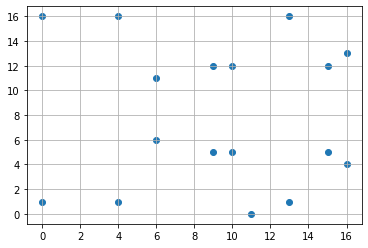

In [41]:
X = []
for i in Points:
    if i == inf:
        pass
    else:
        X.append(i[0])
Y = []
for i in Points:
    if i == inf:
        pass
    else:
        Y.append(i[1])
plt.scatter(X,Y)
plt.grid()